### What are Pixels ?

Pixel is the smallest fragment of an image.

### What are Channel ?

1. 1 channel - shows black and white or greyscale images
2. Red-Green-Blue channels - shows colored images

### What are Pixel Size ?
Every pixel can store 8 bits of memory, for e.g. So, the range of values it can store is 2^8=256, i.e., between 0 to 255. Where 255 represents white shade, and 0 represents black shade. Numbers between 0 & 255 are different shades of black and white "OR" grey

### What are filters ?

Filters are a way to alter the original image. Filters are smaller matrix that are multiplied with larger matrix in a left to right fashion (like a *torch*), for e.g., to result in a different matrix. The resultant matrix will have different pixel values at certain places which will result in altering the source image. This can be inferred as a small convolution operation.

### Standard type of filters ?

1. High-Pass filters: Used for sharpening the image.
2. Low-Pass filters: Used for smoothening the image.

These filters can help in detecting edges or differentiate between brightness.

#### Example functioning of Filters

In [22]:
import numpy as np
from PIL import Image
from scipy.ndimage import convolve
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

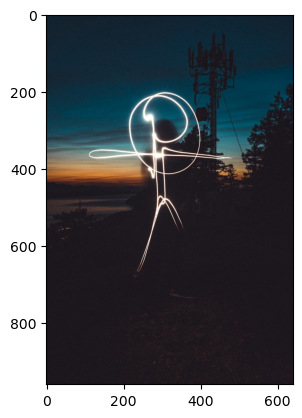

In [97]:
path = "/Users/kashmkj/fastai_repo_22/kashish18.github.io/"

image_profile = imread(path+"/profile.jpg")

plt.imshow(image_profile)
plt.show()

In [98]:
Edge = np.array(
    [[0,1,0],
     [1,-8,1],
     [0,1,0]], dtype=np.float64) # Filter Matrix

Image_channel = []

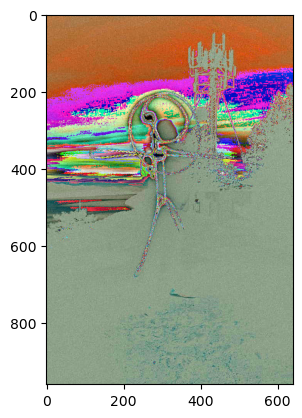

In [99]:
# We have 3 channels since it's a colored image, hence we loop over 3 times.
# convolve(array_input, filter) will do the convolution operation, i.e., 
# multiply input image for each channel with the filter matrix
for channel in range(3):
    res = convolve(image_profile[:,:,channel], Edge)
    Image_channel.append(res)

img = np.dstack((Image_channel[0], Image_channel[1], Image_channel[2]))
plt.imshow(img)
plt.show()

In [101]:
print("Shape of output image = " + str(img.shape))

print("Shape of input image = " + str(image_profile.shape))
    
print("Length of Image channel = " + str(len(Image_channel)))

print("Shape of each Image Channel = " + str(Image_channel[0].shape))

Shape of output image = (960, 640, 3)
Shape of input image = (960, 640, 3)
Length of Image channel = 3
Shape of each Image Channel = (960, 640)


### Which library can we use to get different type of filters ?

There are some in built filters present in PIL library :-
```
from PIL import Image, ImageFilter
from PIL.ImageFilter import (BLUR, CONTOUR, EDGE_ENHANCE...)
```

### Why the concept of convolution ?

There are mainly two reasons why convolution is required instead of having just a simple feed forward NN:
1. Humongous number of input parameters (i.e, pixel size)
2. Exploit the spacial correlation across pixels resulting in reducing in number of operations for NN.

### What is a basic convolution ?

A snapshot of input matrix (For E.g., 3*3) is convolved with a filter matrix (also 3*3), also called Weights. The actual input image can be of size say 10*10. The filter matrix will swipe through the entire input matrix taking a snapshot of 3*3 (just like how a torch moves from left to right and top to bottom). The resultant matrix is a colnvoluted matrix. "Colvolved" involes summation of dot product of two matrices. Convolution helps extracting characteristics in an image. It also helps to reduce computation because at every convolution operation, we are reducing the dimension of the image which will be eventually given as input to the neural network classifier.

### What is a convolutional Neural netowork ?

Convolution combined with a feed forward network is called CNN. We applied convolution to N*M matrix. 

Then we flatten the image to 1D( 1 * ( N * M ) ) and apply the normal feed forward neural network.